## Task 1: Problem Formulation, Data Acquisition and Preparation

In [1]:
#Importing pandas and numpy

import pandas as pd
import numpy as np

#Changing Jupyter setting on output to let it display multiple outputs instead of one as default
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Import IPython.display to display head of dataframe properly
from IPython.display import display

#Import matplotlib and seaborn for data modelling
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Changing Jupyter setting on output to let it display all columns in dataframe
pd.set_option('display.max_columns', None)

#Loading selected dataframe into Jupyter notebook and assigning to new variable
df_load = pd.read_csv('SouthGermanCredit.asc',sep=' ')

#Due to original dataset based on German, changing column labels to English for international viewers. 
df = df_load.rename(columns={'laufkont': 'status',
                         'laufzeit': 'duration',
                         'moral':'credit_history',
                         'verw':'purpose',
                         'hoehe':'amount',
                         'sparkont':'savings',
                         'beszeit':'employment_duration',
                         'rate':'installment_rate',
                         'famges':'personal_status_sex',
                         'buerge':'other_debtors',
                         'wohnzeit':'present_residence',
                         'verm':'property',
                         'alter':'age',
                         'weitkred':'other_installment_plans',
                         'wohn':'housing',
                         'bishkred':'number_credits',
                         'beruf':'job',
                         'pers':'people_liable',
                         'telef':'telephone',
                         'gastarb':'foreign_worker',
                         'kredit':'credit_risk'})

#Visualizing dataframe
print("3 first rows of dataframe:")
display(df.head(3))
print("Shape of df: ", df.shape)
print("\n\nInformation of df:\n\n")
print(df.info())

#Checking if dataframe has missing values, human entry errors, impossible value, outlier 
print("Values of status: ",sorted(df.status.unique()))
print("Minimum and maximum value of duration respectively: ",df.duration.min(),",",df.duration.max())
print("Values of credit_history: ",sorted(df.credit_history.unique()))
print("Values of purpose: ",sorted(df.purpose.unique()))
print("Minimum and maximum value of amount respectively: ",df.amount.min(),",",df.amount.max())
print("Values of savings: ",sorted(df.savings.unique()))
print("Values of employment_duration: ",sorted(df.employment_duration.unique()))
print("Values of installment_rate: ",sorted(df.installment_rate.unique()))
print("Values of personal_status_sex: ",sorted(df.personal_status_sex.unique()))
print("Values of other_debtors: ",sorted(df.other_debtors.unique()))
print("Values of present_residence: ",sorted(df.present_residence.unique()))
print("Values of property: ",sorted(df.property.unique()))
print("Minimum and maximum value of age respectively: ",df.age.min(),",",df.age.max())
print("Values of other_installment_plans: ",sorted(df.other_installment_plans.unique()))
print("Values of housing",sorted(df.housing.unique()))
print("Values of number_credits",sorted(df.number_credits.unique()))
print("Values of job",sorted(df.job.unique()))
print("Values of people_liable",sorted(df.people_liable.unique()))
print("Values of telephone",sorted(df.telephone.unique()))
print("Values of foreign_worker",sorted(df.foreign_worker.unique()))
print("Values of credit_risk",sorted(df.credit_risk.unique()))

#Checking if any duplicated values, return result in an array, if "true" value appeared, dupicated value should be removed
df.duplicated().unique()

3 first rows of dataframe:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1


Shape of df:  (1000, 21)


Information of df:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing  

array([False])

# Task 2: Data Exploration

#### 2.1 Exploring 10 columns in dataframe
includes: status, credit_history, duration, purpose, amount, savings, employment_duration, property, age, job

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


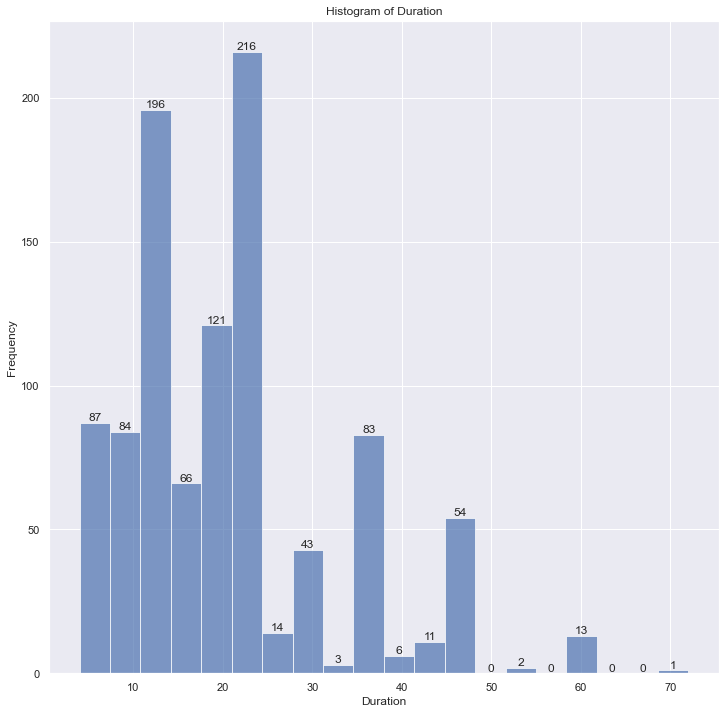

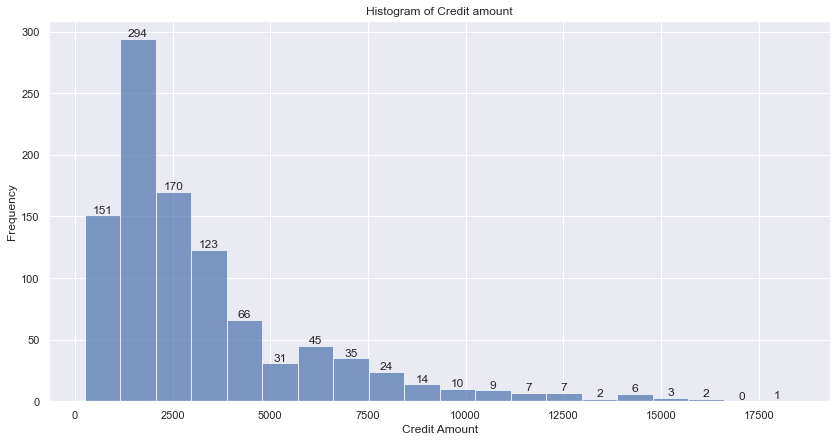

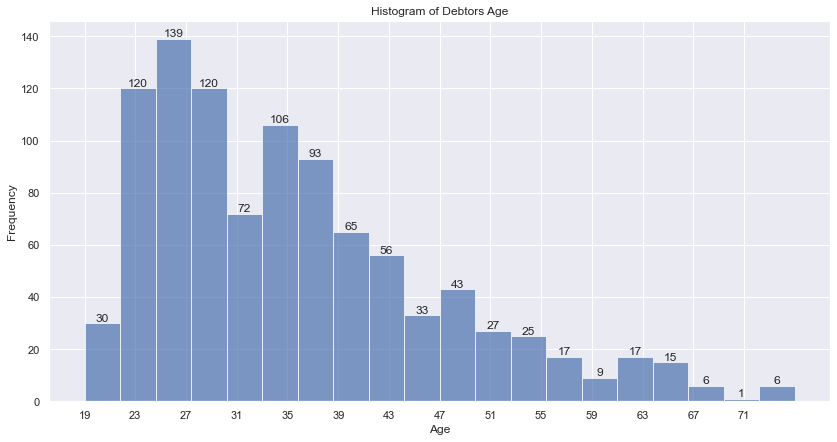

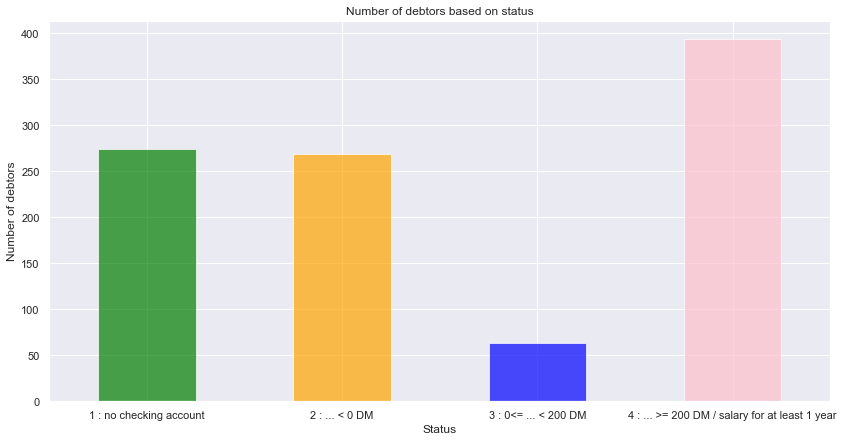

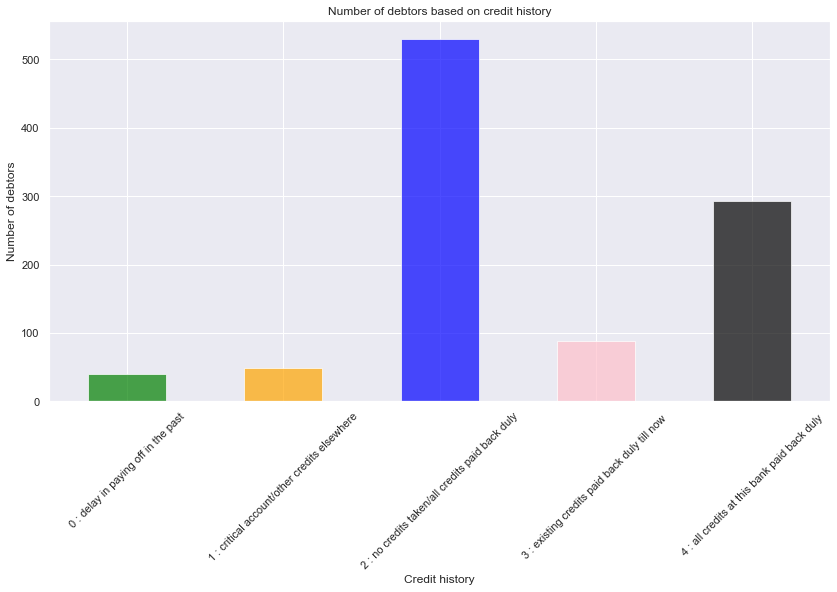

Purpose in table:
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64


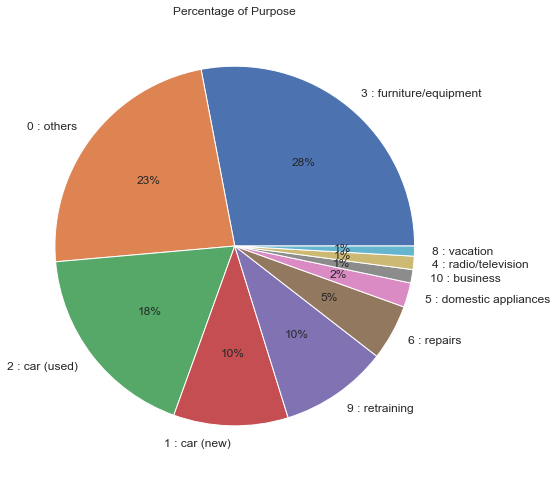

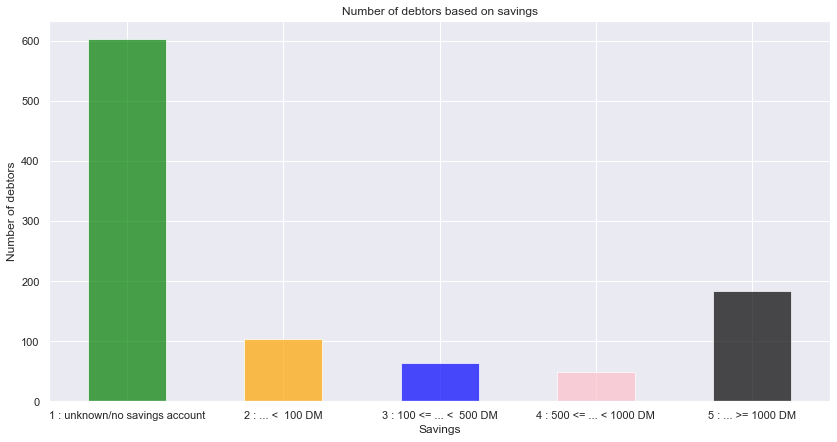

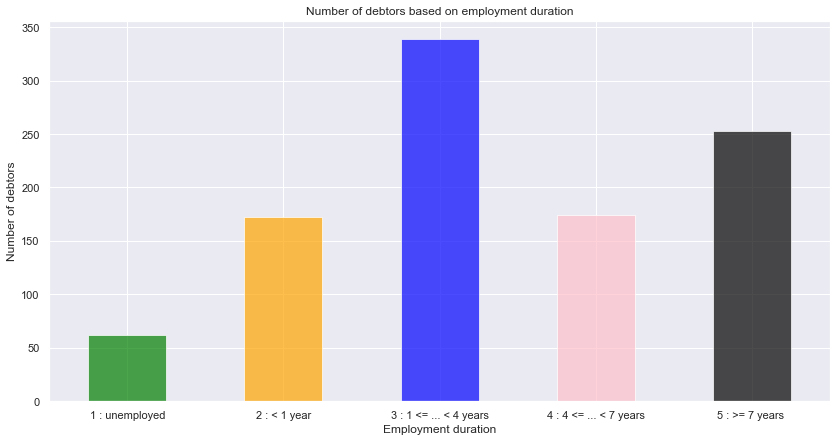

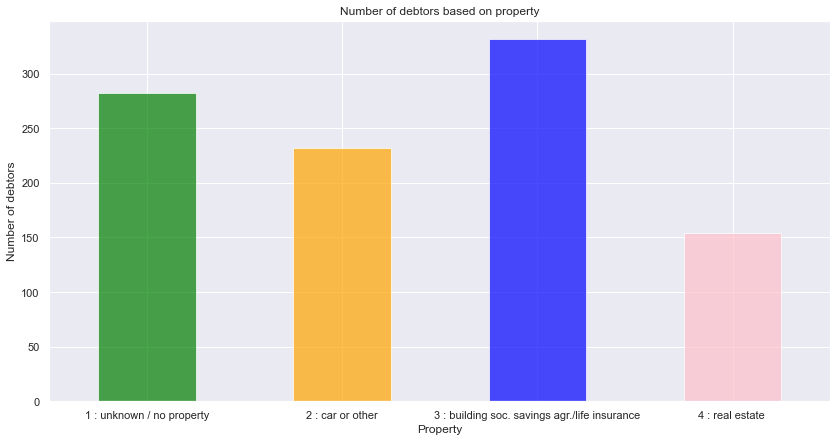

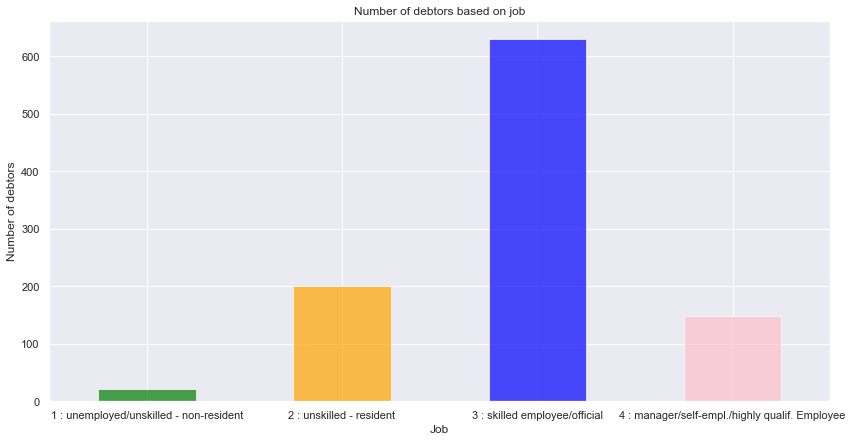

In [2]:
#Describing 3 numerical columns
display(df[['duration','amount','age']].describe())

#Exploring duration column
plt.figure(figsize=(12,12))
counts, edges, bars = plt.hist(df['duration'], bins = 20, color = 'b', alpha = 0.7)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.bar_label(bars)
plt.show();

#Exploring credit amount column
plt.figure(figsize=(14,7))
counts, edges, bars = plt.hist(df['amount'], bins = 20, color = 'b', alpha = 0.7)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Credit amount')
plt.bar_label(bars)
plt.show();

#Exploring age column
plt.figure(figsize=(14,7))
counts, edges, bars = plt.hist(df['age'], bins =20, color = 'b', alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(19, 75, step=4))
plt.title('Histogram of Debtors Age')
plt.bar_label(bars)
plt.show();

#Exploring status column
color =['green','orange','blue','pink']
df['status'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Number of debtors based on status', 
                                              figsize = (14, 7), 
                                              alpha = 0.7, 
                                              color = color)
plt.xlabel('Status')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(4), ('1 : no checking account',
                          '2 : ... < 0 DM',
                          '3 : 0<= ... < 200 DM',
                          '4 : ... >= 200 DM / salary for at least 1 year'),
           rotation = 0)
plt.show();

#Exploring credit_history column
color1=['green','orange','blue','pink','black']
df['credit_history'].value_counts().sort_index().plot(kind = 'bar',
                                                      title = 'Number of debtors based on credit history',
                                                      figsize = (14, 7),
                                                      alpha = 0.7,
                                                      color = color1)
plt.xlabel('Credit history')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(5), ('0 : delay in paying off in the past',
                          '1 : critical account/other credits elsewhere',
                          '2 : no credits taken/all credits paid back duly',
                          '3 : existing credits paid back duly till now ',
                          ' 4 : all credits at this bank paid back duly '),
           rotation = 45)
plt.show();


#Exploring purpose column
df2 = df['purpose'].value_counts()
print('Purpose in table:')
print(df2)
plt.pie(df['purpose'].value_counts(),labels=('3 : furniture/equipment',
                                             '0 : others',
                                             '2 : car (used)',
                                             '1 : car (new)',
                                             '9 : retraining',
                                             '6 : repairs',
                                             '5 : domestic appliances',
                                             '10 : business',
                                             '4 : radio/television',
                                             '8 : vacation'),
        autopct="%0.0f%%",
        textprops={'fontsize':12})
plt.title("Percentage of Purpose");
plt.show();

#Exploring savings column
df['savings'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Number of debtors based on savings', 
                                              figsize = (14, 7), 
                                              alpha = 0.7, 
                                              color = color1)
plt.xlabel('Savings')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(5), ('1 : unknown/no savings account',
                          '2 : ... <  100 DM',
                          '3 : 100 <= ... <  500 DM',
                          '4 : 500 <= ... < 1000 DM',
                          '5 : ... >= 1000 DM'),
           rotation = 0)
plt.show();

#Exploring employment_duration column
df['employment_duration'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Number of debtors based on employment duration', 
                                              figsize = (14, 7), 
                                              alpha = 0.7, 
                                              color = color1)
plt.xlabel('Employment duration')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(5), ('1 : unemployed',
                          '2 : < 1 year',
                          '3 : 1 <= ... < 4 years',
                          '4 : 4 <= ... < 7 years',
                          '5 : >= 7 years '),
           rotation = 0)
plt.show();

#Exploring property column
df['property'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Number of debtors based on property', 
                                              figsize = (14, 7), 
                                              alpha = 0.7, 
                                              color = color)
plt.xlabel('Property')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(4), ('1 : unknown / no property',
                          '2 : car or other',
                          '3 : building soc. savings agr./life insurance',
                          '4 : real estate '),
           rotation = 0)
plt.show();

#Exploring job column
df['job'].value_counts().sort_index().plot(kind = 'bar', 
                                              title = 'Number of debtors based on job', 
                                              figsize = (14, 7), 
                                              alpha = 0.7, 
                                              color = color)
plt.xlabel('Job')
plt.ylabel('Number of debtors')
plt.xticks(np.arange(4), ('1 : unemployed/unskilled - non-resident',
                          '2 : unskilled - resident',
                          '3 : skilled employee/official',
                          '4 : manager/self-empl./highly qualif. Employee'),
           rotation = 0)
plt.show();

### 2.2 Exploring the relationships between 5 pairs of columns 
which are: credit_history and credit_risk; purpose and credit_risk; amount and job; savings and age; property and job.

credit_history   0   1    2   3    4
credit_risk                         
0               25  28  169  28   50
1               15  21  361  60  243


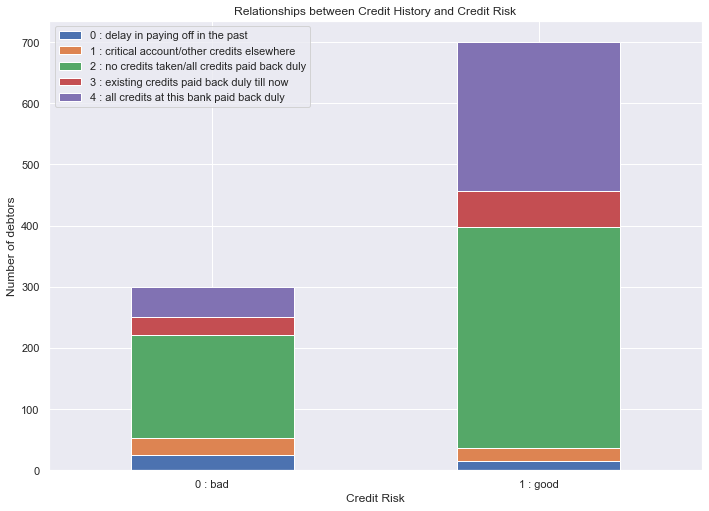

credit_risk   0    1
purpose             
0            89  145
1            17   86
2            58  123
3            62  218
4             4    8
5             8   14
6            22   28
8             1    8
9            34   63
10            5    7


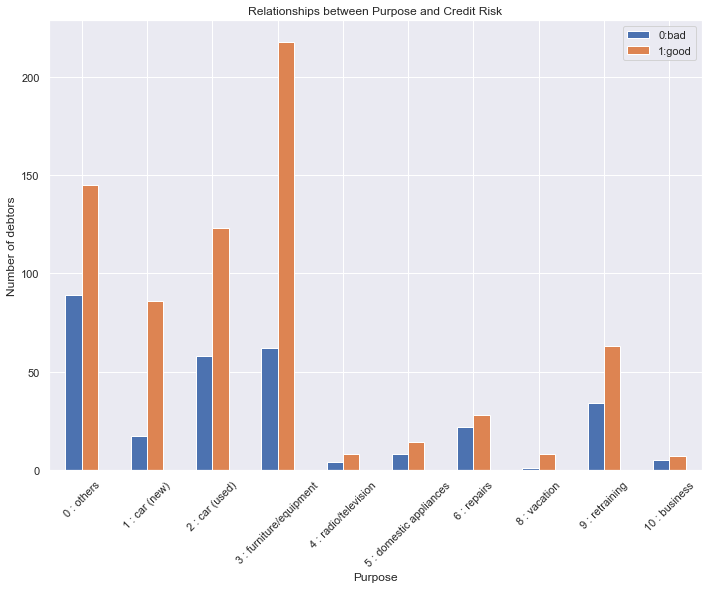

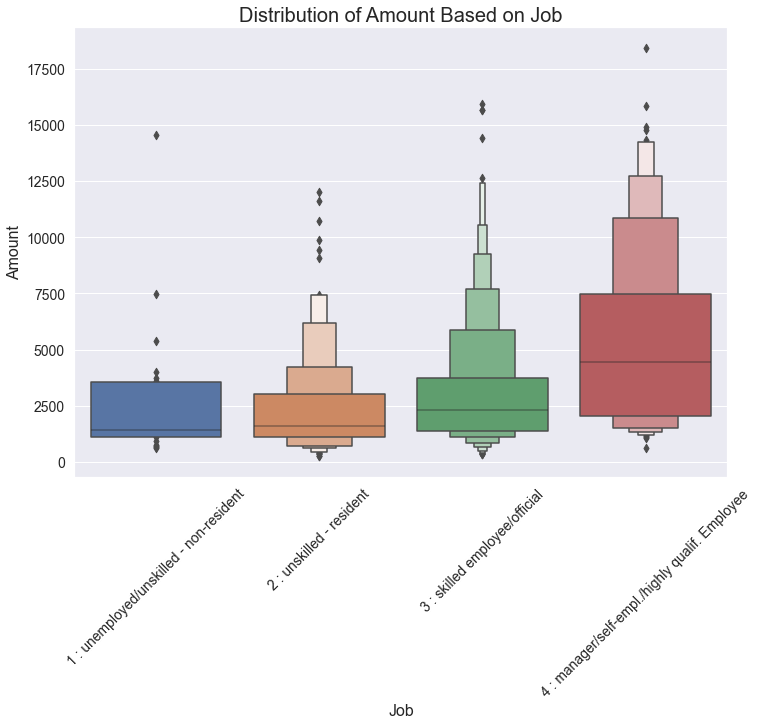

/Users/linhnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/linhnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


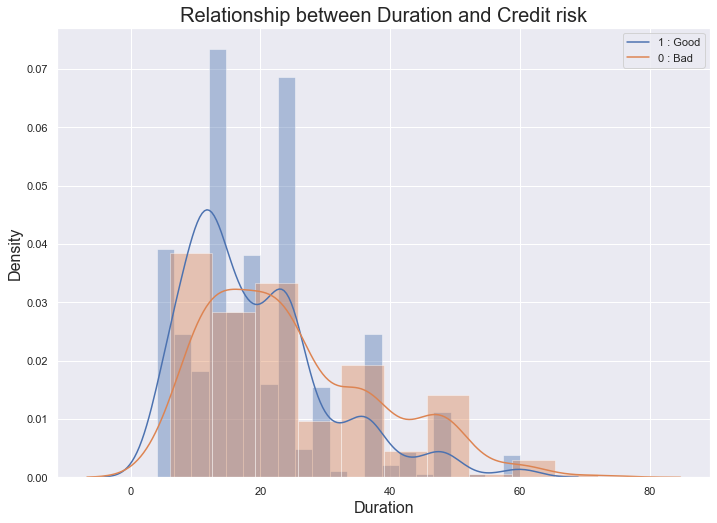

property    1    2    3   4
job                        
1           8    3    5   6
2          99   50   37  14
3         161  150  233  86
4          14   29   57  48


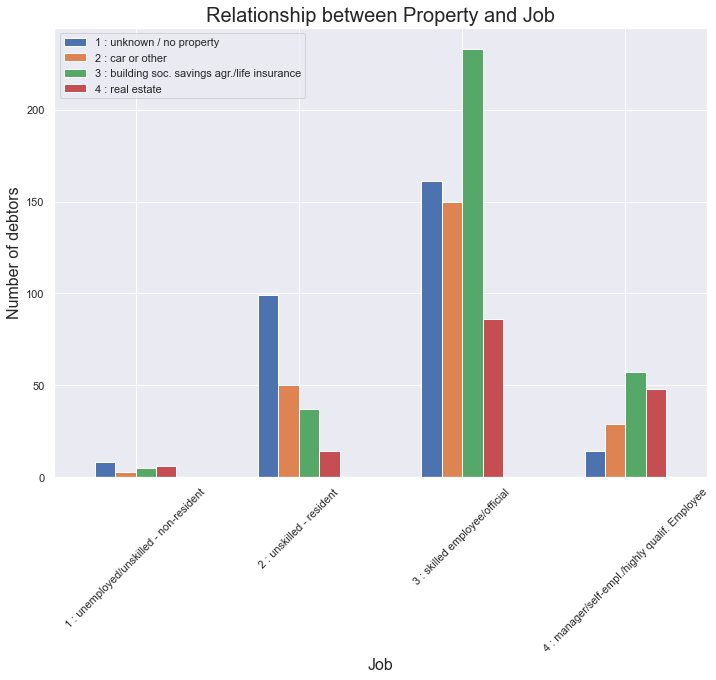

In [3]:
#Relationships between credit_history and credit_risk
df1 = df.groupby(['credit_history', 'credit_risk'])['credit_risk'].size().sort_values().to_frame('Number of debtors').reset_index()
print(df1.pivot_table('Number of debtors', index='credit_risk', columns='credit_history'))
df1.pivot_table('Number of debtors', index='credit_risk', columns='credit_history').plot(kind='bar', stacked = True)
plt.xlabel('Credit Risk')
plt.ylabel('Number of debtors')
plt.title("Relationships between Credit History and Credit Risk")
plt.xticks(np.arange(2), ('0 : bad','1 : good'), rotation = 0)
plt.legend(['0 : delay in paying off in the past',
            '1 : critical account/other credits elsewhere',  
            '2 : no credits taken/all credits paid back duly',
            '3 : existing credits paid back duly till now',
            '4 : all credits at this bank paid back duly'])
plt.show();

#Relationships between purpose and credit_risk
df2 = df.groupby(['purpose', 'credit_risk'])['purpose'].size().sort_values().to_frame('Number of debtors').reset_index()
print(df2.pivot_table('Number of debtors', index='purpose', columns='credit_risk'))
df2.pivot_table('Number of debtors', index='purpose', columns='credit_risk').plot(kind='bar')
plt.xlabel('Purpose')
plt.ylabel('Number of debtors')
plt.title("Relationships between Purpose and Credit Risk")
plt.xticks(np.arange(10), ('0 : others',
                           '1 : car (new)',
                           '2 : car (used)',
                           '3 : furniture/equipment',
                           '4 : radio/television',
                           '5 : domestic appliances',
                           '6 : repairs',
                           '8 : vacation',
                           '9 : retraining',
                           '10 : business'), rotation = 45)
plt.legend(['0:bad','1:good'])
plt.show();

#Relationships between amount and job
sns.boxenplot(x="job", y="amount", data=df)
plt.title("Distribution of Amount Based on Job", fontsize=20)
plt.xlabel("Job", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.xticks(np.arange(4),labels = ('1 : unemployed/unskilled - non-resident',
                                  '2 : unskilled - resident',
                                  '3 : skilled employee/official',
                                  '4 : manager/self-empl./highly qualif. Employee'),
           fontsize=14, rotation = 45);
plt.yticks(fontsize=14)
plt.show();

#Relationship between duration and credit_risk
sns.distplot(df[df['credit_risk']==1]['duration'])
sns.distplot(df[df['credit_risk']==0]['duration'])
plt.legend(['1 : Good','0 : Bad'])
plt.title("Relationship between Duration and Credit risk", fontsize=20)
plt.xlabel("Duration", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.show();

#Relationship between property and job
df3 = df.groupby(['property', 'job'])['job'].size().sort_values().to_frame('Number of debtors').reset_index()
print(df3.pivot_table('Number of debtors', index='job', columns='property'))
df3.pivot_table('Number of debtors', index='job', columns='property').plot(kind='bar')
plt.title("Relationship between Property and Job", fontsize=20)
plt.xlabel("Job", fontsize=16)
plt.ylabel("Number of debtors", fontsize=16)
plt.xticks(np.arange(4), labels = ('1 : unemployed/unskilled - non-resident',
                                    '2 : unskilled - resident',
                                    '3 : skilled employee/official',
                                    '4 : manager/self-empl./highly qualif. Employee'),
           rotation = 45)
plt.legend(['1 : unknown / no property',
            '2 : car or other',
            '3 : building soc. savings agr./life insurance',
            '4 : real estate'])
plt.show();


#### 2.3 Question to explore: 
##### Question: What is the distribution of debtors based on credit risk status among personal status sex? 


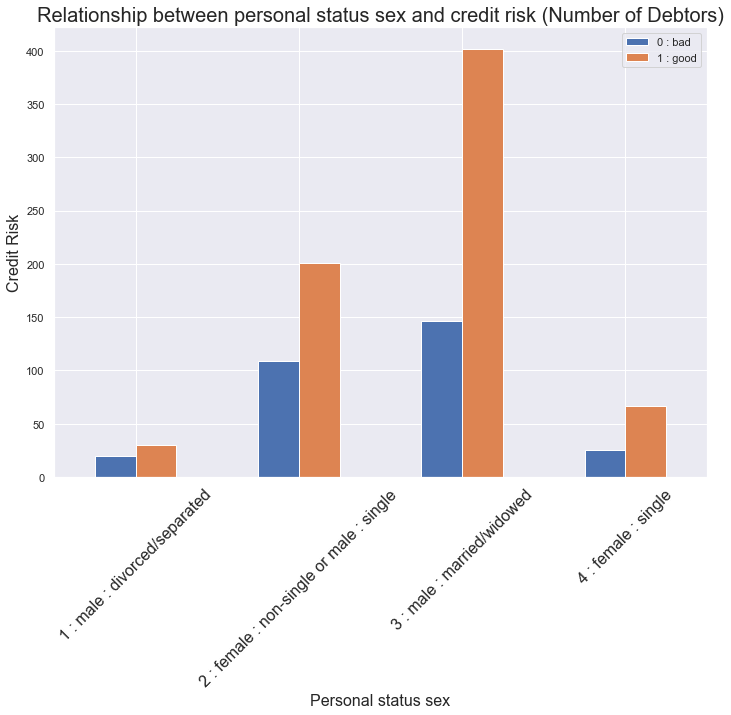

Table of relationship between personal status sex and credit risk
   index  credit_risk  personal_status_sex  Number of debtors  Percentage
0      0            0                    1                 20   40.000000
1      2            1                    1                 30   60.000000
2      4            0                    2                109   35.161290
3      6            1                    2                201   64.838710
4      5            0                    3                146   26.642336
5      7            1                    3                402   73.357664
6      1            0                    4                 25   27.173913
7      3            1                    4                 67   72.826087


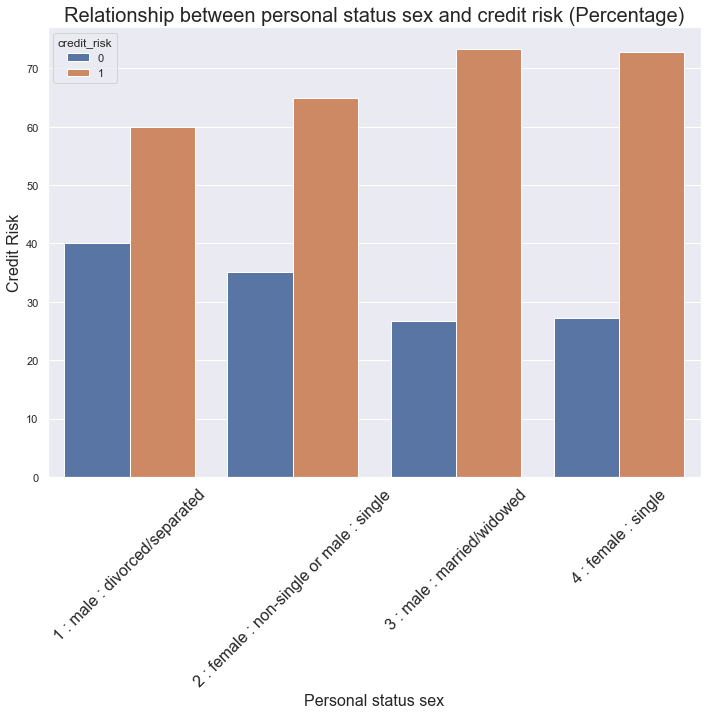

In [4]:
#Observations

df4 = df.groupby(['credit_risk', 'personal_status_sex'])['personal_status_sex'].size().sort_values().to_frame('Number of debtors').reset_index()
df4
df5 = df4.pivot_table('Number of debtors', index='personal_status_sex', columns='credit_risk')

df4.pivot_table('Number of debtors', index='personal_status_sex', columns='credit_risk').plot(kind='bar')
plt.title("Relationship between personal status sex and credit risk (Number of Debtors)", fontsize=20)
plt.xlabel("Personal status sex", fontsize=16)
plt.ylabel("Credit Risk", fontsize=16)
plt.xticks(np.arange(4), labels = ('1 : male : divorced/separated',
                                   '2 : female : non-single or male : single',
                                   '3 : male : married/widowed',
                                   '4 : female : single',),
           rotation = 45, fontsize=16)
plt.legend(['0 : bad',
            '1 : good'])
plt.show();

df4['Percentage'] =  100*df4['Number of debtors']/(df4.groupby(['personal_status_sex'])['Number of debtors'].transform('sum'))
df4_sorted = df4.sort_values(['personal_status_sex','credit_risk']).reset_index()
print('Table of relationship between personal status sex and credit risk')
print(df4_sorted)
sns.barplot(x = 'personal_status_sex', y = 'Percentage', hue = 'credit_risk', data = df4_sorted)
plt.title("Relationship between personal status sex and credit risk (Percentage)", fontsize=20)
plt.xlabel("Personal status sex", fontsize=16)
plt.ylabel("Credit Risk", fontsize=16)
plt.xticks(np.arange(4), labels = ('1 : male : divorced/separated',
                                   '2 : female : non-single or male : single',
                                   '3 : male : married/widowed',
                                   '4 : female : single',),
           rotation = 45, fontsize=16)

plt.show();

# Task 3: Data Modelling 

### 3.1 Splitting data

by using sklearn library

In [5]:
#Import sklearn library
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Split the data
X = df.drop('credit_risk', axis = 1)
y = df['credit_risk']

In [6]:
#Suite 1: 50% for training and 50% for testing and set the random_state to 11
X1_train, X1_test, y1_train, y1_test = train_test_split (X, y, test_size = 0.5, random_state = 11)
print( 'Suite 1:')
X1_train
X1_test
y1_train
y1_test

Suite 1:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
779,4,15,2,6,4623,2,3,3,3,1,2,2,40,3,2,1,4,2,2,2
230,4,24,2,3,1278,1,5,4,3,1,1,1,36,3,2,1,4,2,2,2
551,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,1,1,2
146,1,24,2,1,2964,5,5,4,3,1,4,4,49,1,3,1,3,1,2,2
913,1,36,1,2,2746,1,5,4,3,1,4,3,31,1,2,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1,10,4,0,1038,1,4,4,3,2,3,2,49,3,2,2,3,2,2,2
91,2,30,2,3,2991,5,5,2,2,1,4,3,25,3,2,1,3,2,1,2
80,4,24,4,0,2022,1,3,4,2,1,4,3,37,3,2,1,3,2,2,2
703,1,30,2,2,3622,4,5,4,2,1,4,2,57,3,1,2,3,2,2,2


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
25,2,11,3,3,4771,1,4,2,3,1,4,2,51,3,2,1,3,2,1,2
464,2,12,2,0,7472,5,1,1,2,1,2,1,24,3,1,1,1,2,1,2
372,2,24,4,1,7758,4,5,2,2,1,4,4,29,3,1,1,3,2,1,2
730,2,42,1,1,9283,1,1,1,3,1,2,4,55,1,3,1,4,2,2,2
757,1,12,0,0,1082,1,3,4,3,1,4,3,48,1,2,2,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1,12,4,0,3499,1,3,3,2,2,2,1,29,3,2,2,3,2,1,2
986,1,14,2,0,8978,1,5,1,1,1,4,2,45,3,2,1,4,2,2,1
53,4,12,4,3,2331,5,5,1,3,2,4,1,49,3,2,1,3,2,2,2
392,3,6,4,6,1047,1,3,2,2,1,4,2,50,3,2,1,2,2,1,2


779    0
230    1
551    1
146    1
913    0
      ..
337    1
91     1
80     1
703    1
921    0
Name: credit_risk, Length: 500, dtype: int64

25     1
464    1
372    1
730    1
757    0
      ..
353    0
986    0
53     1
392    1
650    1
Name: credit_risk, Length: 500, dtype: int64

In [7]:
#Suite 2: 60% for training and 40% for testing and set the random_state to 22
X2_train, X2_test, y2_train, y2_test = train_test_split (X, y, test_size = 0.4, random_state = 22)
print( 'Suite 2:')
X2_train
X2_test
y2_train
y2_test

Suite 2:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
331,4,18,4,3,2404,1,3,2,2,1,2,3,26,3,2,2,3,2,1,2
738,2,15,2,5,1308,1,5,4,3,1,4,3,38,3,2,2,2,2,1,2
437,4,6,3,3,935,1,3,3,2,1,2,1,24,3,2,1,3,2,1,2
666,2,7,2,3,2329,1,2,1,2,3,1,1,45,3,2,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,1,24,2,1,2924,1,3,3,3,3,4,4,63,1,2,1,3,1,2,2
960,4,18,2,0,6761,5,3,2,3,1,4,3,68,2,1,2,3,2,1,2
812,4,18,2,5,1943,1,2,4,2,1,4,1,23,3,2,1,3,2,1,2
132,3,6,2,2,2116,1,3,2,3,1,2,1,41,3,2,1,3,2,2,2


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
866,2,12,2,0,1295,1,2,3,2,1,1,3,25,3,1,1,3,2,1,2
191,2,36,2,6,3711,5,3,2,4,1,2,3,27,3,2,1,3,2,1,2
732,4,15,4,1,3368,4,5,3,3,1,4,4,23,3,1,2,3,2,2,2
657,2,6,2,3,753,1,3,2,2,3,3,1,64,3,2,1,3,2,1,2
155,4,24,4,3,2684,1,3,4,3,1,2,1,35,3,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,4,54,0,1,9436,5,3,2,3,1,2,2,39,3,2,1,2,1,1,2
853,3,24,4,0,1344,5,4,4,3,1,2,1,37,1,2,2,2,1,1,2
180,4,9,2,4,1236,1,2,1,2,1,4,1,23,3,1,1,3,2,2,2
954,3,12,1,9,609,1,2,4,2,1,1,1,26,1,2,1,1,2,1,2


2      1
331    1
738    1
437    1
666    1
      ..
356    1
960    0
812    0
132    1
885    0
Name: credit_risk, Length: 600, dtype: int64

866    0
191    1
732    1
657    1
155    1
      ..
309    1
853    0
180    1
954    0
245    1
Name: credit_risk, Length: 400, dtype: int64

In [8]:
#Suite 3: 80% for training and 20% for testing and set the random_state to 33
X3_train, X3_test, y3_train, y3_test = train_test_split (X, y, test_size = 0.2, random_state = 33)
print( 'Suite 3:')
X3_train
X3_test
y3_train
y3_test

Suite 3:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
866,2,12,2,0,1295,1,2,3,2,1,1,3,25,3,1,1,3,2,1,2
909,1,48,0,2,7119,1,3,3,3,1,4,4,53,3,3,2,3,1,1,2
640,1,36,4,2,2348,1,3,3,4,1,2,2,46,3,2,2,3,2,2,2
582,4,24,2,3,3621,2,5,2,3,1,4,3,31,3,2,2,3,2,1,2
516,2,24,3,9,6967,2,4,4,3,1,4,3,36,3,1,1,4,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2,7,2,3,2576,1,3,2,3,3,2,1,35,3,2,1,3,2,1,1
578,1,33,4,2,4281,3,3,1,2,1,4,3,23,3,2,2,3,2,1,2
728,4,36,4,1,11054,5,3,4,3,1,2,3,30,3,2,1,4,2,2,2
391,3,12,4,0,1480,3,1,2,3,1,4,4,66,1,3,3,1,2,1,2


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
286,1,6,4,3,338,3,5,4,3,1,4,3,52,3,2,2,3,2,1,2
402,1,6,2,1,1352,3,1,1,2,1,2,2,23,3,1,1,1,2,2,2
253,4,36,2,3,3595,1,5,4,3,1,2,3,28,3,2,1,3,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
372,2,24,4,1,7758,4,5,2,2,1,4,4,29,3,1,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,3,18,2,0,1961,1,5,3,2,1,2,3,23,3,2,1,4,2,1,2
626,4,12,2,0,2859,5,1,4,3,1,4,4,38,3,2,1,4,2,2,2
207,2,15,2,3,1444,5,2,4,3,1,1,2,23,3,2,1,3,2,1,2
714,4,6,2,0,3518,1,3,2,3,3,3,2,26,3,1,1,3,2,1,2


866    0
909    0
640    1
582    0
516    1
      ..
658    1
578    0
728    1
391    1
20     1
Name: credit_risk, Length: 800, dtype: int64

286    1
402    1
253    1
4      1
372    1
      ..
358    1
626    1
207    1
714    1
122    1
Name: credit_risk, Length: 200, dtype: int64

### 3.2 Choosing models and performing requirements
- Chosen models: Decision tree and Random forest

In [9]:
#Import decision tree classifier, confusion matrix, accuracy score and classification report from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

#### 3.2.1 Decision tree
Choosing parameters: 
- Gini Impurity is more efficient than entropy in terms of computing power
- Splitter random as it can be less prone to overfitting
- Set max leaf nodes to 30 to reduce calculating time
- Set random state to an assigned number to control the randomness of the estimator

In [10]:
clf = DecisionTreeClassifier(criterion='gini',
                             splitter = 'random',
                             max_leaf_nodes = 30,
                             random_state = 93 )

Train the model

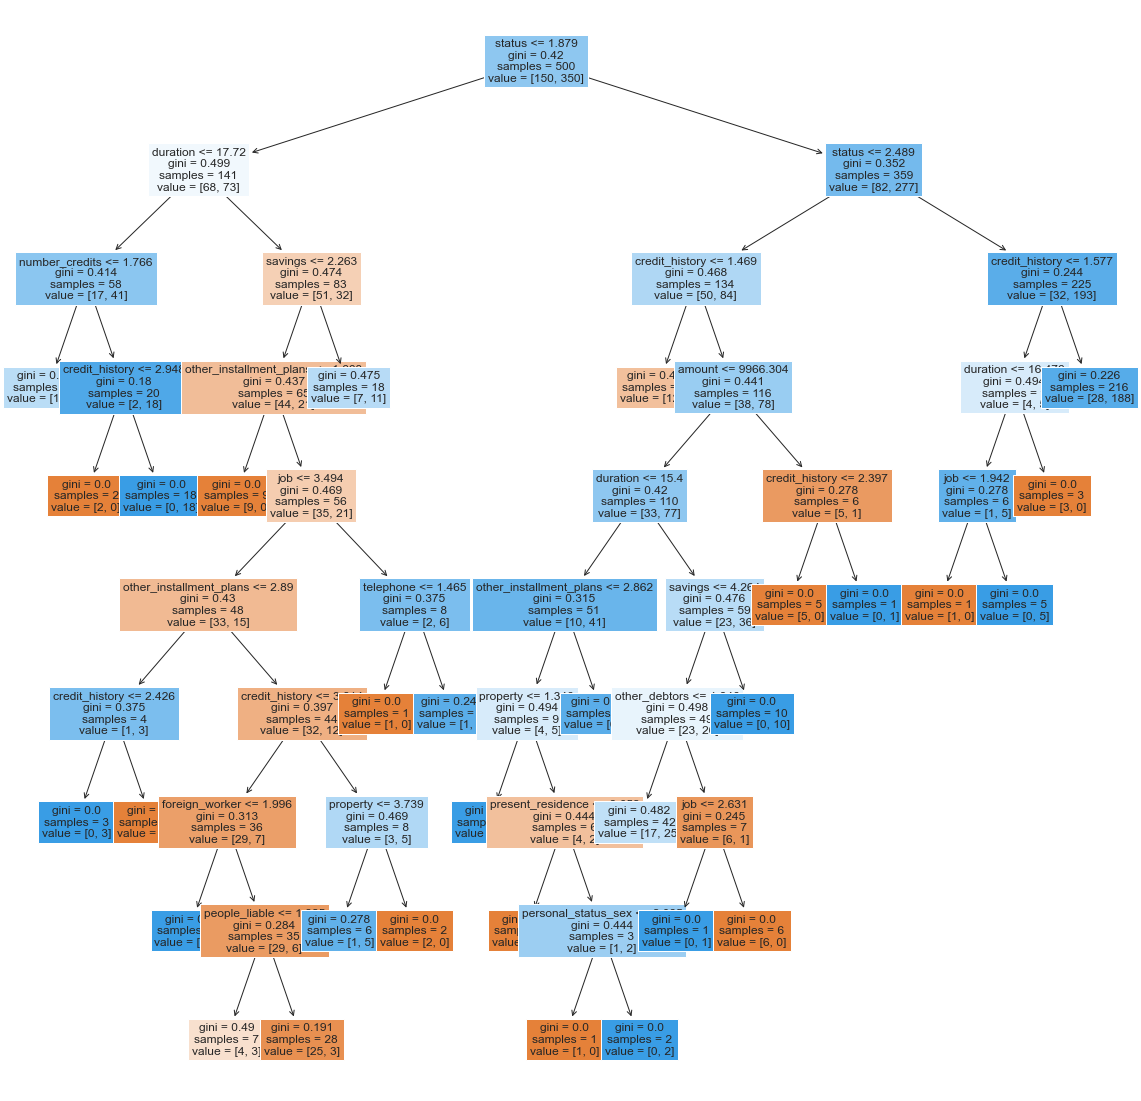

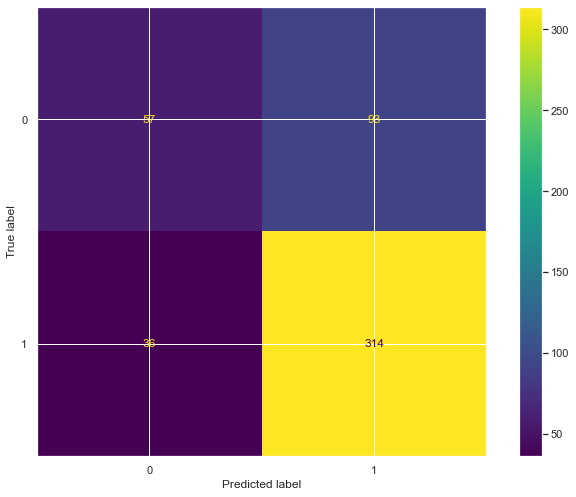

              precision    recall  f1-score   support

           0       0.61      0.38      0.47       150
           1       0.77      0.90      0.83       350

    accuracy                           0.74       500
   macro avg       0.69      0.64      0.65       500
weighted avg       0.72      0.74      0.72       500



In [11]:
#Suite 1: 
clf1_trained = clf.fit(X1_train, y1_train)
y1_dt_pred = clf1_trained.predict(X1_test)

fig = plt.figure(figsize =(20,20))
fig_dt_1 = tree.plot_tree(clf1_trained,
                          feature_names = df.drop('credit_risk', axis = 1).columns,
                          filled = True,
                          fontsize = 12) #Visualize tree for suite 1

cm_dt_1 = confusion_matrix (y1_test, y1_dt_pred)
disp_dt_1 = ConfusionMatrixDisplay(confusion_matrix=cm_dt_1,
                                   display_labels=clf.classes_)
disp_dt_1.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y1_test, y1_dt_pred)) #Showing classification report

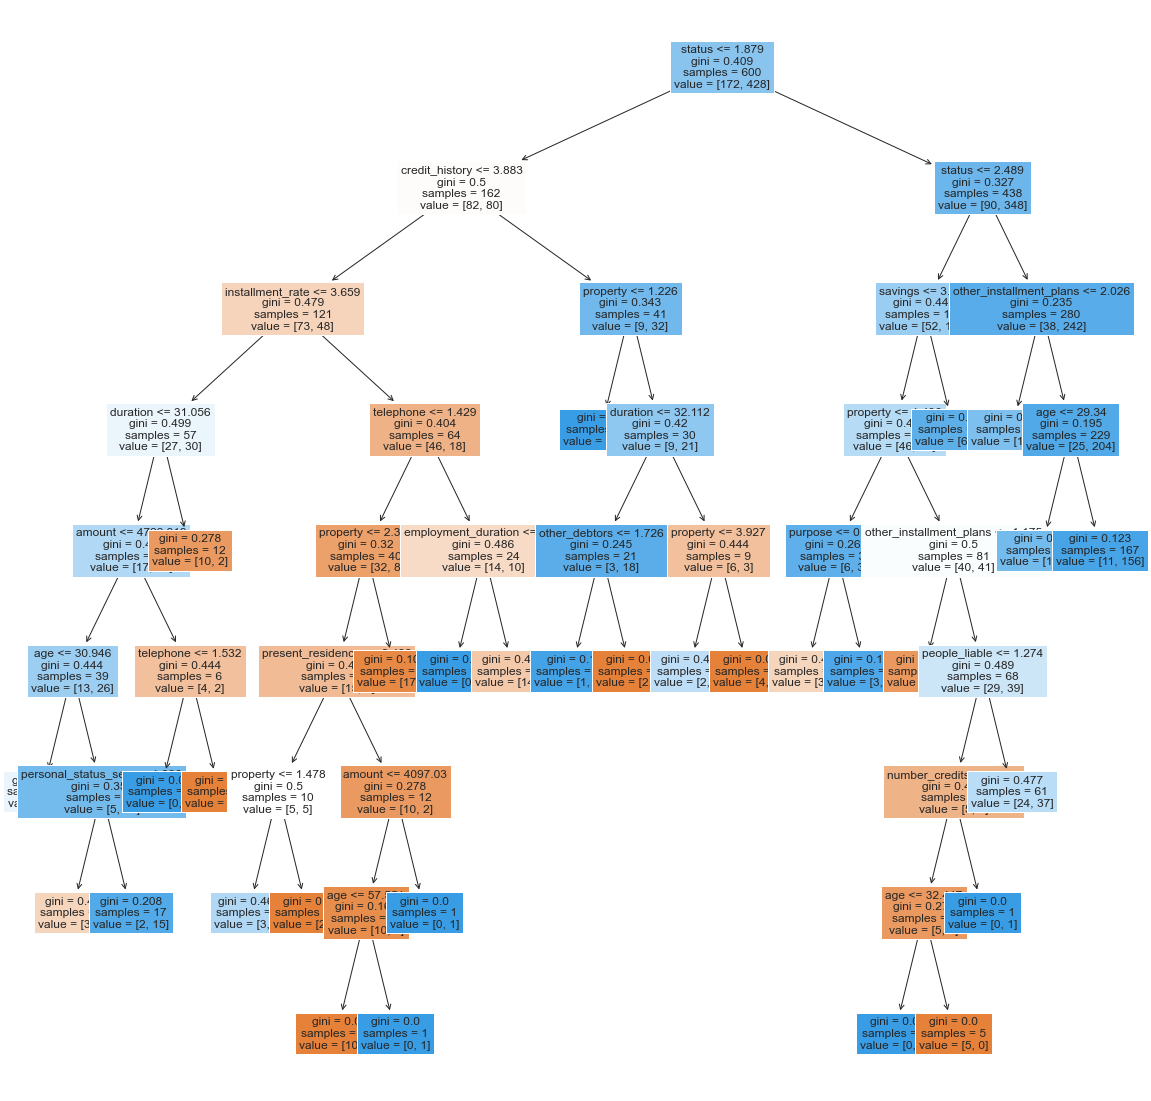

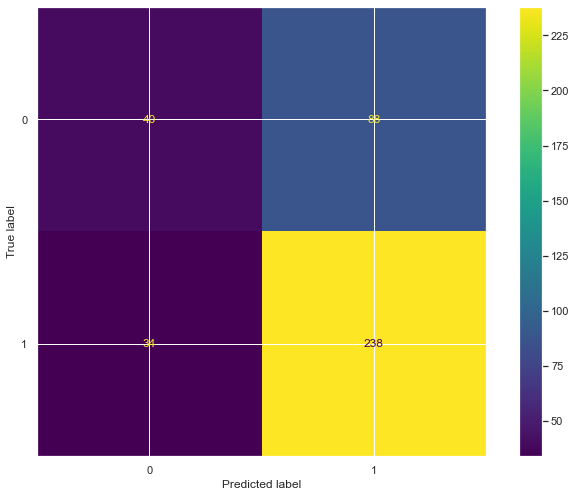

              precision    recall  f1-score   support

           0       0.54      0.31      0.40       128
           1       0.73      0.88      0.80       272

    accuracy                           0.69       400
   macro avg       0.64      0.59      0.60       400
weighted avg       0.67      0.69      0.67       400



In [12]:
#Suite 2:
clf2_trained = clf.fit(X2_train, y2_train)
y2_dt_pred = clf2_trained.predict(X2_test)

fig = plt.figure(figsize =(20,20))
fig_dt_2 = tree.plot_tree(clf2_trained,
                          feature_names = df.drop('credit_risk', axis = 1).columns,
                          filled = True,
                          fontsize = 12) #Visualize tree for suite 2

cm_dt_2 = confusion_matrix (y2_test, y2_dt_pred)
disp_dt_2 = ConfusionMatrixDisplay(confusion_matrix=cm_dt_2,
                                   display_labels=clf.classes_)
disp_dt_2.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y2_test, y2_dt_pred)) #Showing classification report

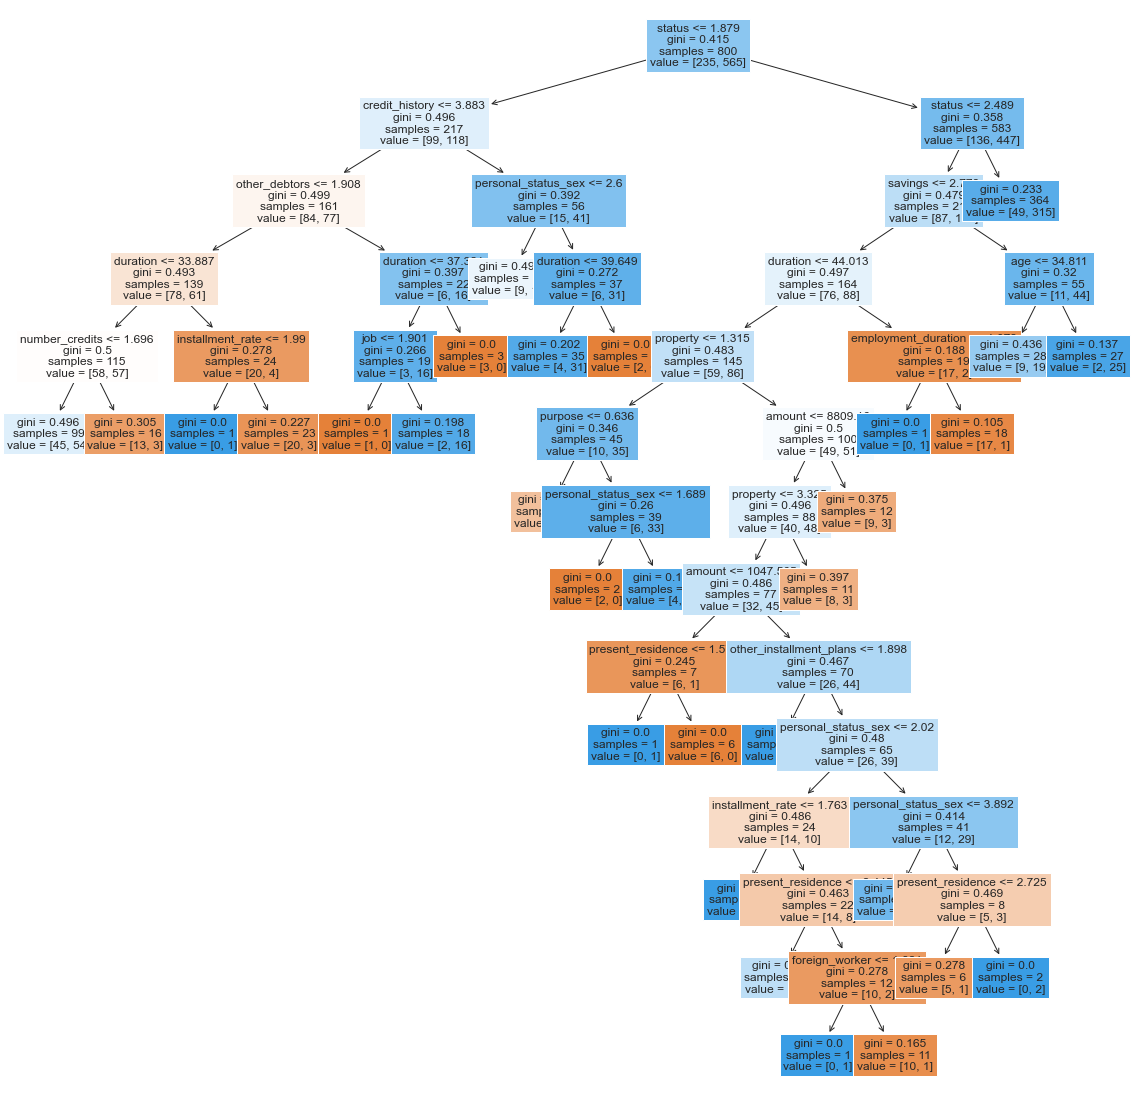

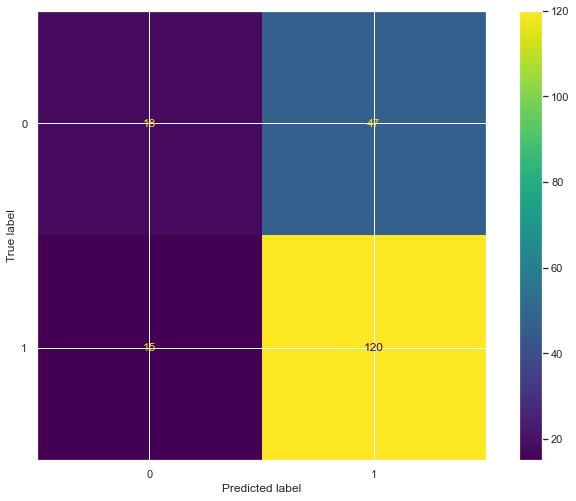

              precision    recall  f1-score   support

           0       0.55      0.28      0.37        65
           1       0.72      0.89      0.79       135

    accuracy                           0.69       200
   macro avg       0.63      0.58      0.58       200
weighted avg       0.66      0.69      0.66       200



In [13]:
#Suite 3:
clf3_trained = clf.fit(X3_train, y3_train)
y3_dt_pred = clf3_trained.predict(X3_test)

fig = plt.figure(figsize =(20,20))
fig_dt_3 = tree.plot_tree(clf3_trained,
                          feature_names = df.drop('credit_risk', axis = 1).columns,
                          filled = True,
                          fontsize = 12) #Visualize tree for suite 3

cm_dt_3 = confusion_matrix (y3_test, y3_dt_pred)
disp_dt_3 = ConfusionMatrixDisplay(confusion_matrix=cm_dt_3,
                                   display_labels=clf.classes_)
disp_dt_3.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y3_test, y3_dt_pred)) #Showing classification report

#### 3.2.2 Random forest
Choosing parameters:
- Gini Impurity is more efficient than entropy in terms of computing power
- Set max leaf nodes to 30 to reduce calculating time
- Set random state to an assigned number to control the randomness of the estimator
- For n_estimators as the number of tree in the forest, using a test to calculate accuracy to find out the best number for this parameter as below

Suite 1:


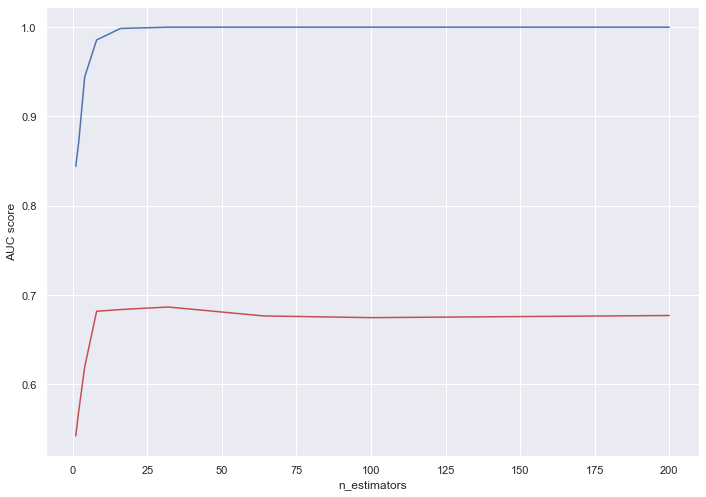

Suite 2:


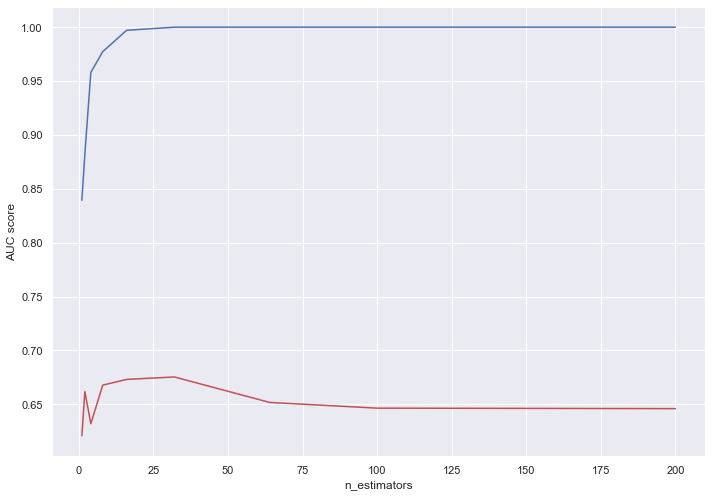

Suite 3:


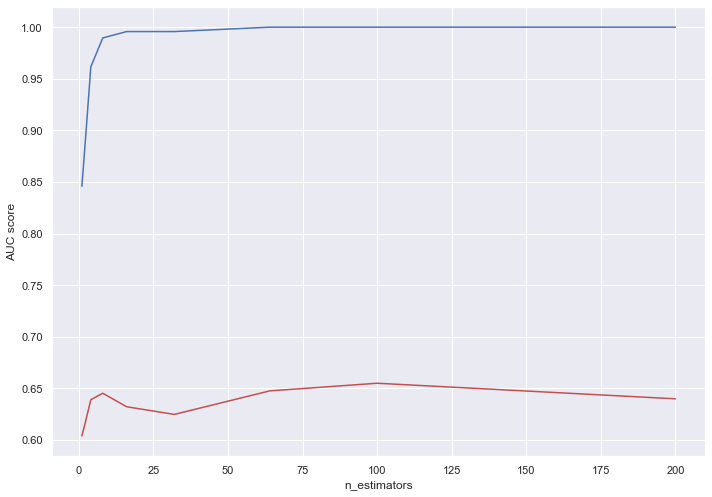

In [14]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train1_results = []
test1_results = []

for est in n_estimators:
    rf = RandomForestClassifier(n_estimators = est, n_jobs = -1, random_state = 1)
    rf.fit(X1_train, y1_train)
    train_pred = rf.predict(X1_train)
    false_positive_rate, true_positive_rate, thesholds = roc_curve(y1_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train1_results.append(roc_auc)
    y1_pred = rf.predict(X1_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y1_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test1_results.append(roc_auc)
    

line1, = plt.plot(n_estimators, train1_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test1_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
print('Suite 1:')
plt.show();


train2_results = []
test2_results = []

for est in n_estimators:
    rf = RandomForestClassifier(n_estimators = est, n_jobs = -1, random_state = 2)
    rf.fit(X2_train, y2_train)
    train_pred = rf.predict(X2_train)
    false_positive_rate, true_positive_rate, thesholds = roc_curve(y2_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train2_results.append(roc_auc)
    y2_pred = rf.predict(X2_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y2_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test2_results.append(roc_auc)
    

line1, = plt.plot(n_estimators, train2_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test2_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
print('Suite 2:')
plt.show();

train3_results = []
test3_results = []

for est in n_estimators:
    rf = RandomForestClassifier(n_estimators = est, n_jobs = -1, random_state = 3)
    rf.fit(X3_train, y3_train)
    train_pred = rf.predict(X3_train)
    false_positive_rate, true_positive_rate, thesholds = roc_curve (y3_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train3_results.append(roc_auc)
    y3_pred = rf.predict(X3_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_test, y3_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test3_results.append(roc_auc)
    

line1, = plt.plot(n_estimators, train3_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test3_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
print('Suite 3:')
plt.show();

As observation n_estimator can be 8 in this case.

In [15]:
rf  = RandomForestClassifier(n_estimators = 8,
                             criterion='gini',
                             max_leaf_nodes = 30,
                             random_state = 99)

Train the model

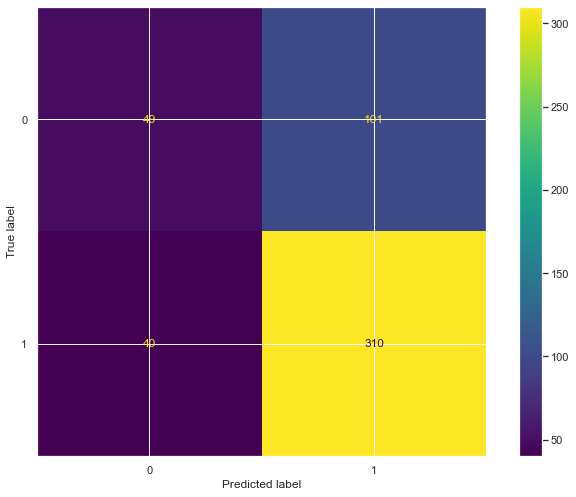

              precision    recall  f1-score   support

           0       0.55      0.33      0.41       150
           1       0.75      0.89      0.81       350

    accuracy                           0.72       500
   macro avg       0.65      0.61      0.61       500
weighted avg       0.69      0.72      0.69       500



In [16]:
#Suite 1:
rf1_trained = rf.fit(X1_train, y1_train)
y1_rf_pred = rf.predict(X1_test)

cm_rf_1 = confusion_matrix (y1_test, y1_rf_pred)

disp_rf_1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_1,
                                   display_labels=clf.classes_)
disp_rf_1.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y1_test, y1_rf_pred)) #Showing classification report

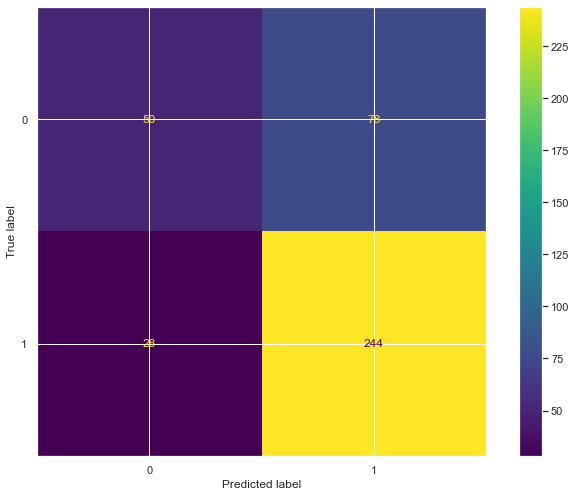

              precision    recall  f1-score   support

           0       0.64      0.39      0.49       128
           1       0.76      0.90      0.82       272

    accuracy                           0.73       400
   macro avg       0.70      0.64      0.65       400
weighted avg       0.72      0.73      0.71       400



In [17]:
#Suite 2:
rf2_trained = rf.fit(X2_train, y2_train)
y2_rf_pred = rf.predict(X2_test)

cm_rf_2 = confusion_matrix (y2_test, y2_rf_pred)
disp_rf_2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_2,
                                   display_labels=clf.classes_)
disp_rf_2.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y2_test, y2_rf_pred)) #Showing classification report

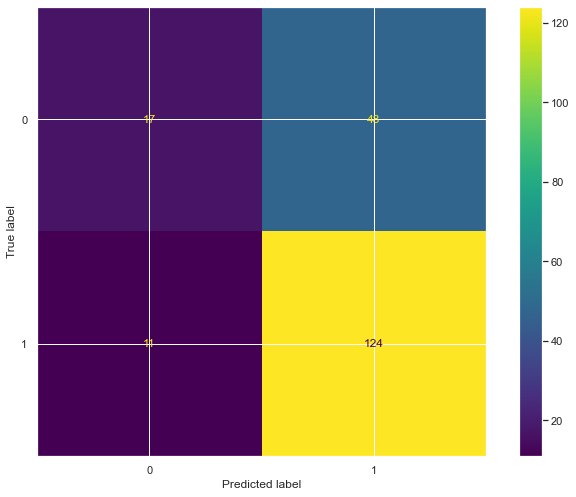

              precision    recall  f1-score   support

           0       0.61      0.26      0.37        65
           1       0.72      0.92      0.81       135

    accuracy                           0.70       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.68      0.70      0.66       200



In [18]:
#Suite 3:
rf3_trained = rf.fit(X3_train, y3_train)
y3_rf_pred = rf.predict(X3_test)

cm_rf_3 = confusion_matrix (y3_test, y3_rf_pred)
disp_rf_3 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_3,
                                   display_labels=clf.classes_)
disp_rf_3.plot()
plt.show(); #Visualize confusion matrix
print(classification_report(y3_test, y3_rf_pred)) #Showing classification report

### 3.3 Comparison between two chosen model
Using feature_importances_ and bar chart to visualize differences between two chosen model

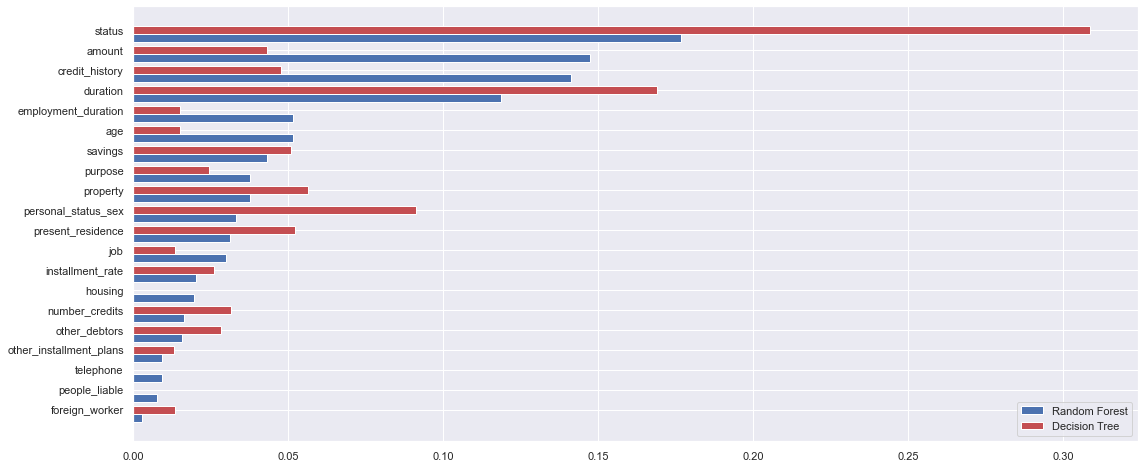

In [19]:
feature_importance=pd.DataFrame({'rf':rf.feature_importances_,
                                 'clf':clf.feature_importances_}
                                ,index=df.drop('credit_risk', axis = 1).columns)

feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf'],0.4,color='b',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['clf'],0.4,color='r',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show();